## Maximizing revenue for taxi cab drivers through payment type analysis

## Problem statement

In today's competitive world of taxi services, maximizing revenue is crucial for both long-term success and driver satisfaction.

## Objective

The main goal of this project is to analyze the impact of payment methods on taxi fares.

## Research question

Is there a significant difference in taxi fares based on the payment method used, and can this information be used to encourage payment methods that lead to higher revenue for drivers, while maintaining a positive experience for customers?

## Importing libraries
- Pandas for handling structured data in DataFrame (tabular) format.
- Numpy for numerical operations.
- Matplotlib for plotting visualizations to analyze the data trends and distributions visually.
- Seaborn for barplots and histograms.
- scipy.stats contains probability distributions and is used here to perform hypothesis testing, probability calculations, and other statistical analyses required for the A/B testing in this project.
- warnings module manages and controls warning messages that caution about the potential issues in the code but do not stop the program from running.
- warnings.filterwarnings("ignore") supresses all warning messages in the notebook for a clean and focused analysis.
- traintestsplit: Splits the dataset into training and testing sets for model evaluation.
- crossvalscore: Performs cross-validation to assess the model's performance on different subsets of the data.
- LinearRegression: Fits a linear model to predict the target variable based on the features.
- meansquarederror: Measures the average squared difference between predicted and actual values to evaluate model accuracy.
- r2score: Indicates the proportion of variance in the target variable explained by the model, showing its goodness of fit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Loading the dataset

In [2]:
# Reading the dataset
taxi_data = pd.read_csv("data/taxi_data.csv")

In [3]:
# Printing the first five values of all the features in the dataset
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
# Printing the last five values of all the features in the dataset
taxi_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6499995,2.0,02/01/2020 12:52:43 PM,02/01/2020 01:02:11 PM,1.0,1.21,1.0,N,238,239,1.0,7.5,0.0,0.5,2.16,0.00,0.3,14.91,2.5
6499996,2.0,02/01/2020 12:38:19 PM,02/01/2020 01:19:03 PM,1.0,17.77,2.0,N,132,100,1.0,52.0,0.0,0.5,12.28,6.12,0.3,73.70,2.5
6499997,2.0,02/01/2020 12:12:39 PM,02/01/2020 12:25:20 PM,1.0,3.57,1.0,N,13,33,1.0,13.5,0.0,0.5,3.36,0.00,0.3,20.16,2.5
6499998,2.0,02/01/2020 12:42:47 PM,02/01/2020 01:09:27 PM,1.0,5.85,1.0,N,209,230,2.0,23.5,0.0,0.5,0.00,0.00,0.3,26.80,2.5
6499999,2.0,02/01/2020 12:02:24 PM,02/01/2020 12:13:36 PM,4.0,1.89,1.0,N,142,236,1.0,9.5,0.0,0.5,2.56,0.00,0.3,15.36,2.5


### Exploratory Data Analysis

In [5]:
# Checking the size of the dataset
# shape returns the number of rows and columns of the dataset
taxi_data.shape

(6500000, 18)

In [6]:
# Checking the datatypes of the features present in the dataset
print(taxi_data.dtypes)

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object


#### The first step in data analysis should always be to identify the features in the dataset that can be used to calculate and analyze the target variable more effectively.

In [7]:
# Calculating the trip_duration from the pickup and dropoff datetime

# Converting the pickup and dropoff time datatypes to datetime objects as they are present in some other format
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

# Creating a feature called trip_duration and using it to store the trip_duration time
# by subtracting dropoff time and pickup time
taxi_data['trip_duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']

In [8]:
print(taxi_data.dtypes)

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
trip_duration            timedelta64[ns]
dtype: object


In [9]:
# Printing the first five values in the dataset to check how it looks now
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18



#### The newly created feature 'trip_duration' is in timedelta format.
#### This feature displays time in the HH:MM:SS format. It is very difficult to analyze the exact trip_duration from such a format. Hence, it is necessary to convert this entire time into minutes. Other time formats like hours and seconds can also be used here, but the entire time trip_duration being converted to minutes makes it more comprehensible and easy to understand.
#### In order to do so, it is first required to compute the total seconds and then convert the seconds to minutes.

In [10]:
# Converting time in the HH:MM:SS format to minutes
taxi_data['trip_duration'] = taxi_data['trip_duration'].dt.total_seconds() / 60

In [11]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [12]:
taxi_data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
trip_duration                   float64
dtype: object

## Data cleaning

The quality of insights and predictions heavily depends on the quality of the data.

It involves the following:
1. Dropping Unncessary Columns
2. Handling Missing Values
3. Correcting Data Types
4. Dealing with Duplicates
5. Outlier Removal

## Dropping unnecessary columns
- There are many columns in the dataset, but as per the problem statement, only few fields are required. Rest columns would serve no purpose to the study.
- Therefore, the further process would involve extracting the necessary features from the dataset, and then later, dropping the unnecessary columns.
- As the problem statement is revolving around payment type, fare amount, and other factors influencing the fare amount, filtering the data is necessary to have only passengercount, paymenttype, tripdistance, fareamount, and trip_duration as the features in the dataset.

In [13]:
# Extracting the required features from the dataset and storing them in the same dataset
taxi_data = taxi_data[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'trip_duration']]


# alternate option is to drop the unwanted columns directly from the dataset
#taxi_data.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
#                'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
#                'DOLocationID', 'extra', 'mta_tax', 'tip_amount',
#                'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
#                'total_amount'], axis = 1, inplace = True)

In [14]:
# checking the filtered data with relevant columns essential for the analysis
# by printing the first 5 values in the dataset
taxi_data.head()

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


## Handling missing values
- The first step involves finding out the number of null values in the dataset.
- Using the number of null values, their percentage in the dataset can be calculated.
- If this percentage is not that significant, then those null values can be dropped from the dataset.
- If the percentage is very high, then replacing those values with some other value like mean, median, mode, etc. is a solution.

In [15]:
# Finding the number of values that have null values in it
taxi_data.isnull().sum()

passenger_count    79229
payment_type       79229
fare_amount            0
trip_distance          0
trip_duration          0
dtype: int64

In [16]:
# Finding out the percentage of null values
print(f"Missing data comprises of {65441/len(taxi_data)*100}% of the data.")

Missing data comprises of 1.0067846153846154% of the data.


In [17]:
# since the percentage of null values is not that significant
# percentage = 1.0217%
# Hence, drop those values
taxi_data.dropna(inplace=True)

In [18]:
# Printing the data to check the number of rows
# After handling the missing values
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6499995,1.0,1.0,7.5,1.21,9.466667
6499996,1.0,1.0,52.0,17.77,40.733333
6499997,1.0,1.0,13.5,3.57,12.683333
6499998,1.0,2.0,23.5,5.85,26.666667


## Correcting data types
- The columns 'passengercount' and 'paymenttype' are originally in float format.
- They cannot be float as they represent discrete values and should be integers because 1.5 passengers does not exist in reality.
- Hence, converting these columns to correct data types (from float to int) improves accuracy.

In [19]:
# Changing the data types from float to int
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int64')
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

## Dealing with duplicates
- Duplicate rows are always problematic in the analysis. They can skew the analysis by over-representing certain data points, leading to biased results. For example, identical trips recorded more than once can distort fare averages and payment method preferences.
- Why is this happening? This is happening because in the original dataset where there were 18 features earlier, each data point considerably represented distinct values due to different combinations. But when certain features were selected, these combinations started to repeat.
- Removing duplicate values ensures the analysis remains unbiased and does not give misleading insights. Hence, drop these values.

In [20]:
# Checking for duplicate values
taxi_data[taxi_data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6499992,1,1,6.5,1.18,7.050000
6499993,1,1,8.0,1.75,8.400000
6499994,1,1,8.0,1.56,8.400000
6499995,1,1,7.5,1.21,9.466667


In [21]:
# Dropping the duplicate values
taxi_data.drop_duplicates(inplace = True)

In [22]:
# After removing the missing values and duplicate rows, we are now left with
# these many records
taxi_data.shape

(3036459, 5)

## Distribution of passenger count and payment type in analysis
- After cleaning the data, it is always necessary to understand how different categories are distributed within the dataset.
- Why this analysis? This helps in identifying patterns and making sense of the relationships between the different variables and features.
- The columns 'passengercount' and 'paymenttype' are categorical variables. They represent distinct categories, with passengercount indicating the number of passengers and paymenttype representing how the fare was paid (e.g., 1 for credit card, 2 for cash etc.).
- The distributions would allow to answer questions like:

- What is the most common passenger count in a taxi?

## Analysis of passenger count distribution

In [23]:
# Value_counts gives you the frequency of the category
# normalize parameter when passed to value_count return the % of the contribution
taxi_data['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581534
2    0.190399
3    0.066438
5    0.063065
6    0.039385
4    0.036121
0    0.023037
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

## Interpretation of the passenger count distribution

The output above indicates that:

- 58% of the rides have 1 passenger.

This means that most rides are single-passenger trips, which implies that optimizing services around single passengers could lead to efficiency gains for taxi drivers.

## Analysis of payment type distribution

In [24]:
# Repeat the same with the payment_type feature
# payment type distribution
taxi_data['payment_type'].value_counts(normalize = True)

payment_type
1    6.779756e-01
2    3.078049e-01
3    8.742091e-03
4    5.477103e-03
5    3.293310e-07
Name: proportion, dtype: float64

## Interpretation of the results for payment_type distribution
Similar is the case with payment_type. The results above show that:

- 67.8% of trips are paid using the payment type 1.

## Insights from both the distributions
Focusing solely on the payment types 'card' and 'cash' denoted by 1 and 2 in the dataset could be of better help as they comprise a larger proportion comparatively. To ensure that the analysis centers on these payment methods, it is necessary to filter the data accordingly, and therefore, excluding all other types.

Moreover, examining the distribution of passenger count reveals that trips with more than 5 passengers are rare.

## Removing the values that we do not require through selection after interpreting the results from distribution

In [25]:
# filtering for passenger count from 1 to 5 (both inclusive)
taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]

# filtering for payment type 1 and 2
taxi_data = taxi_data[taxi_data['payment_type'] < 3]

In [26]:
# checking for the size of the dataset after filtering
taxi_data.shape

(2806185, 5)

In [27]:
# Replacing the payment type's encoded values - 1 and 2 with 'Card' and 'Cash' respectively
taxi_data['payment_type'].replace([1,2],['Card','Cash'], inplace=True)

In [28]:
# checking for the changes
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6499987,2,Card,13.5,3.01,16.166667
6499989,4,Cash,29.5,7.00,37.116667
6499996,1,Card,52.0,17.77,40.733333
6499998,1,Cash,23.5,5.85,26.666667


## Descriptive statistics of the data
Descriptive statistics provides a summary of the central tendency, dispersion, and shape of the distribution of each feature.

In [29]:
# descriptive statistics of the data
taxi_data.describe()

,passenger_count,fare_amount,trip_distance,trip_duration
count,2.806185e+06,2.806185e+06,2.806185e+06,2.806185e+06
mean,1.734508e+00,1.781410e+01,4.542451e+00,2.418423e+01
std,1.177486e+00,1.506292e+01,4.893464e+00,9.291006e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.740000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.480000e+00,2.335000e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


## Interpretation of descriptive statistics of the data
- 4 numerical features namely 'passengercount', 'fareamount', 'tripdistance', and 'trip_duration' are displayed. The 5th feature 'paymenttype' is not displayed in descriptive statistics because it is a categorical data.
- The minimum value of fareamount, tripdistance, and trip_duration is negative which is not possible. It means that there are wrong and unrealistic values in the dataset and these values have to be removed as they cannot be used for further analysis. Only those values which are greater than zero need to be considered.
- Negative values in these columns are likely a result of errors during data collection. The presence of extreme values in the dataset, such as negative fare amounts, trip distances, and excessively long trip_durations, highlights the need for further data cleaning.

### Interpretation of Outliers:

- Looking at the 25th, 50th, 75th, and 100th (max) percentile, it can be said that there is a possibility of outliers (particularly high values) in the dataset.

In [30]:
# Filtering the records for only positive values
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['trip_duration']>0]

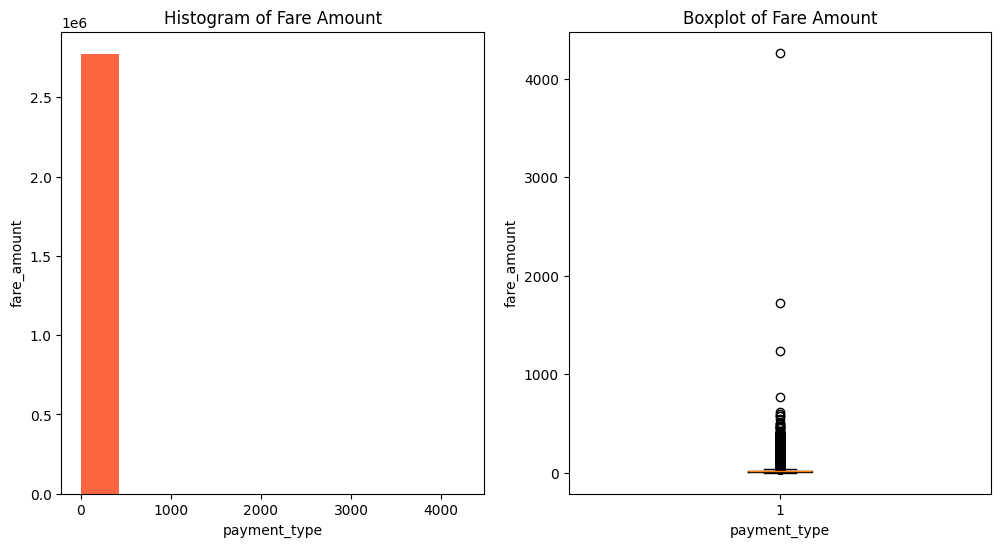

In [31]:
# Checking for outliers in fare_amount
plt.figure(figsize=(12,6))

# Plotting a histogram
plt.subplot(1,2,1)
plt.hist(taxi_data['fare_amount'], color='#FA643F')
plt.title("Histogram of Fare Amount")
plt.xlabel("payment_type")
plt.ylabel("fare_amount")

# Plotting a Boxplot
plt.subplot(1,2,2)
plt.boxplot(taxi_data['fare_amount'])
plt.title("Boxplot of Fare Amount")
plt.xlabel("payment_type")
plt.ylabel("fare_amount")

plt.show()

## Interpretation of histogram & boxplot

By visualizing the distribution of fare amounts, it is targeted to identify trends and spot any anomalies or outliers.

- There are a lot of outliers in the data spanning up to the value of 4000.

In [32]:
# Removing outliers using interquartile range for the numerical variables

# iterating over the columns
for col in ['fare_amount', 'trip_distance', 'trip_duration']:
  Q1 = taxi_data[col].quantile(0.25) # first quartile
  Q3 = taxi_data[col].quantile(0.75) # third quartile
  IQR = Q3 - Q1 # interquartile range

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # filtering out the outliers
  taxi_data = taxi_data[(taxi_data[col] >= lower_bound) & (taxi_data[col] <= upper_bound)]

In [33]:
# Reviewing the data after making relevant changes
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6499980,1,Card,8.0,1.23,9.083333
6499986,1,Card,12.0,2.74,13.900000
6499987,2,Card,13.5,3.01,16.166667
6499998,1,Cash,23.5,5.85,26.666667


## Analyzing the relationship between payment type, trip distance, and fare amount

- To better understand how the passenger behavior, specifically regarding trip distance and fare amount, varies based on the payment method, there is a need to explore the distribution of payment types (Card vs.

- Fare Amounts for passengers paying with Card vs Cash.

- By comparing these distributions, we can:

- Identify which payment type is associated with higher or lower fare amounts.

- This visualization will help stakeholders understand fare amount ranges and typical trip distances for each payment type.

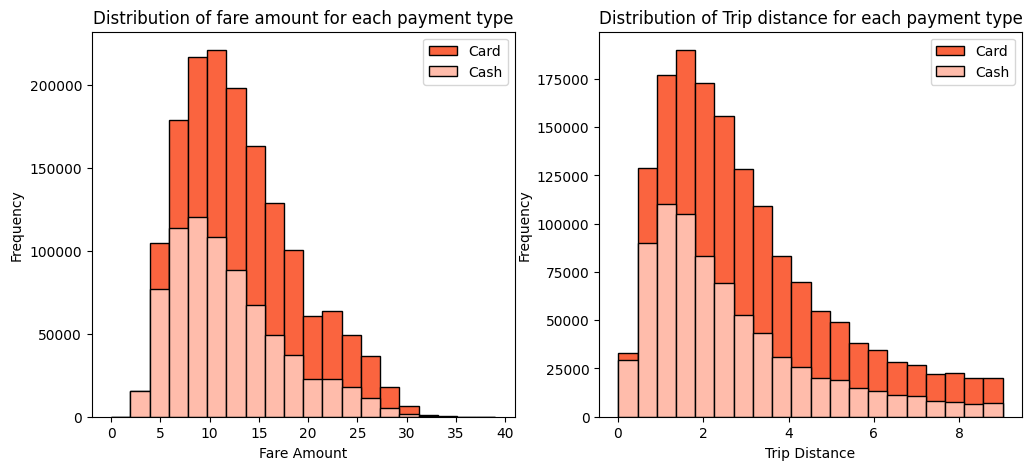

In [34]:
# Plotting stacked histogram
plt.figure(figsize=(12,5))

# Stacked histogram of fare amount for each payment type
plt.subplot(1,2,1)
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color ='#FFBCAB', label = 'Cash')
plt.legend(['Card', 'Cash'])
plt.title("Distribution of fare amount for each payment type")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

# Stacked histogram of trip distance for each payment type
plt.subplot(1,2,2)
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color ='#FFBCAB', label = 'Cash')
plt.legend(['Card', 'Cash'])
plt.title("Distribution of Trip distance for each payment type")
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")

plt.show()

In [35]:
# calculating the mean and standard deviation using group by on payment type
taxi_data.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.149007  5.879689      3.009029  2.007860
Cash           11.789805  5.642582      2.617152  1.928551

## Preference of payment type

To analyze passengers' preferences for payment methods, the proportion of the two payment types will have to be assessed.

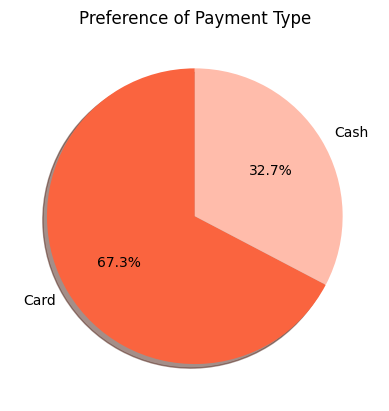

In [36]:
plt.title('Preference of Payment Type')
plt.pie(taxi_data['payment_type'].value_counts(normalize=True), labels = taxi_data['payment_type'].value_counts().index,
        startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#FA643F', '#FFBCAB'])
plt.show()

## Passenger count analysis

- The objective is to explore how payment preferences vary with the number of passengers traveling in the cab.

- This plot will help to understand whether the payment method chosen changes based on the number of passengers, providing insights into how payment preferences shift with varying passenger numbers.

In [37]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = taxi_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# renaming passenger_count to count to reset the index
passenger_count.rename(columns={'passenger_count':'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum() )* 100

# creating a new empty dataframe to store the distribution of each payment type (useful for visualization)
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card', 'Cash']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:, -1]

df

,payment_type,1,2,3,4,5
0,Card,39.538037,14.264151,5.332789,2.777317,5.403221
1,Cash,20.044851,6.763918,2.373104,1.424715,2.077897


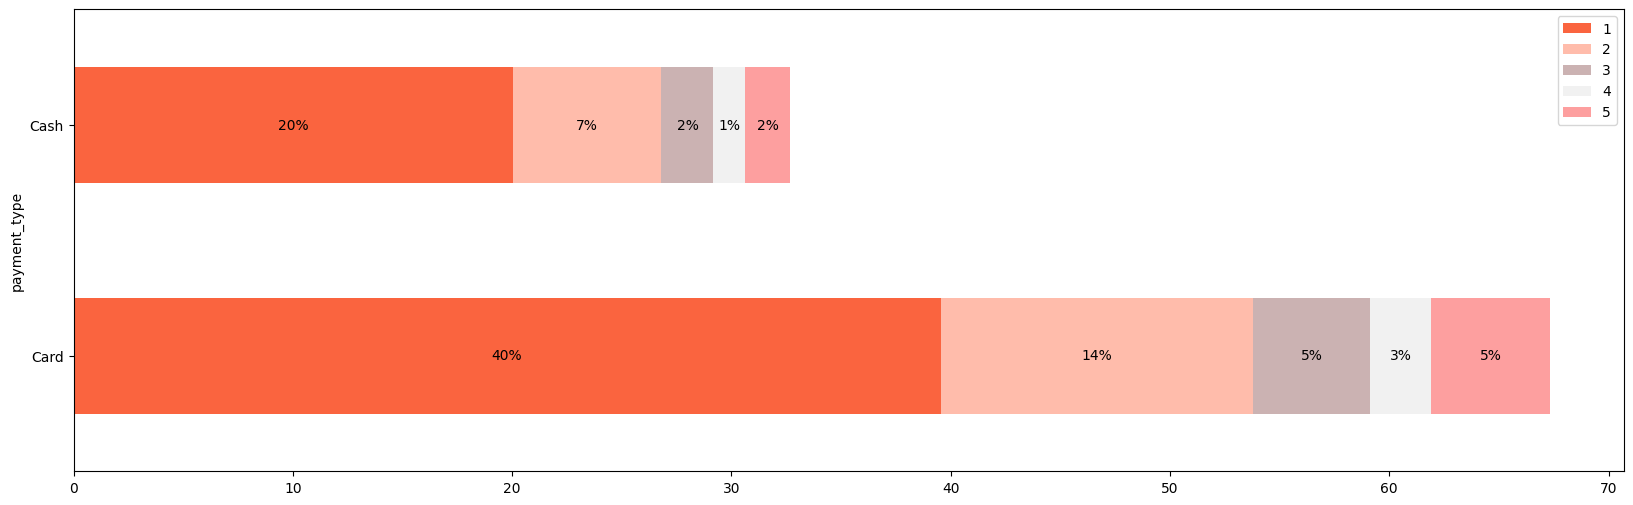

In [38]:
# Plotting the stacked bar plot
fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type', kind='barh', stacked=True, color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'], ax=ax)

# Add percentage text
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  ax.text(x + width / 2,
          y + height / 2,
          '{:.0f}%'.format(width),
          horizontalalignment='center',
          verticalalignment='center',
          fontsize = 10, color='black' if width > 0 else 'white')

## Understanding the relationship between trip_duration and fare amount

- While feature selection, the trip duration was calculated by subtracting the pickup time from the dropoff time.

In [39]:
# Checking for linearity using Correlation Coefficient (Pearson’s r)
correlation = taxi_data['trip_duration'].corr(taxi_data['fare_amount'])
print("Pearson Correlation Coefficient:", correlation)


Pearson Correlation Coefficient: 0.8709078485695835


- Both the trip_duration and fareamount are continuous values.

In [40]:
# Checking the trip_duration column
taxi_data['trip_duration']

0           4.800000
1           7.416667
2           6.183333
3           4.850000
5           0.883333
             ...    
6499980     9.083333
6499986    13.900000
6499987    16.166667
6499998    26.666667
6499999    11.200000
Name: trip_duration, Length: 2322781, dtype: float64

In [41]:
# checking for missing values in trip_duration field
taxi_data['trip_duration'].isnull().sum()

np.int64(0)

In [42]:
# Defining features (trip_duration) and target (fare_amount)
x = taxi_data[['trip_duration']]
y = taxi_data['fare_amount']

In [43]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
# Predict on the test set
y_pred = model.predict(x_test)
y_pred

array([16.31944908, 18.57703649, 13.70296316, ..., 12.33683335,
       12.41787495, 12.01266695], shape=(464557,))

The R-squared value analyzed below indicates how well the model fits the data, explaining the variance in fare amounts based on trip duration.

In [46]:
# Evaluate the Model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 8.243426406853755
R-squared: 0.7570410467486847


In [47]:
# Cross-validation to ensure model generalization.
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')

print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", np.mean(cv_scores))
print("Standard Deviation of R-squared Scores:", np.std(cv_scores))

Cross-Validation R-squared Scores: [0.79402212 0.7670035  0.7488579  0.72478907 0.71769344]
Mean R-squared Score: 0.7504732061943137
Standard Deviation of R-squared Scores: 0.027951943587208622


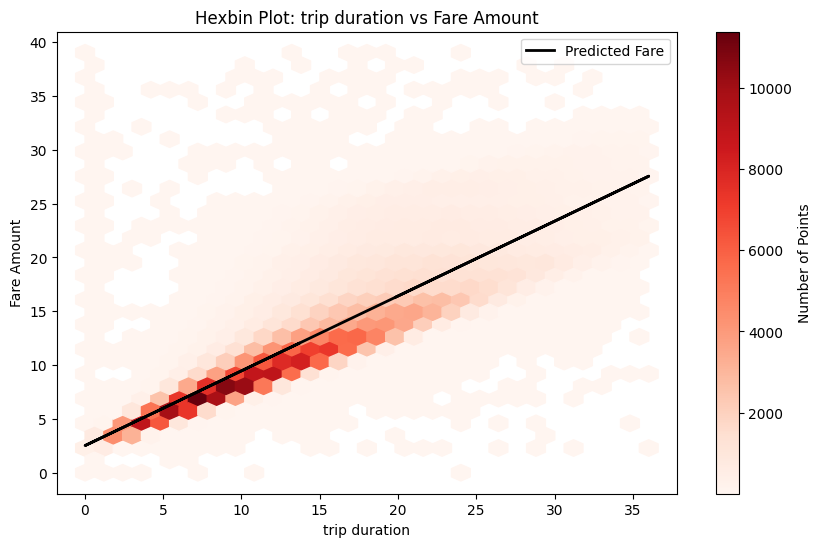

In [48]:
# Visualize the relationship between trip duration and Fare amount using Hexbin plot

plt.figure(figsize=(10, 6))
plt.hexbin(x_test['trip_duration'], y_test, gridsize=30, cmap='Reds', mincnt=1)
plt.colorbar(label='Number of Points')

# Plot predicted fare
plt.plot(x_test, y_pred, color='black', linewidth=2, label='Predicted Fare')
plt.xlabel('trip duration')
plt.ylabel('Fare Amount')
plt.title('Hexbin Plot: trip duration vs Fare Amount')
plt.legend()
plt.show()

- Residual Plot below shows the relationship between trip duration (on the x-axis) and the residuals (on the y-axis).

- This helps to visually assess if the model performs poorly for certain trip durations, which may indicate areas where trip duration and fare amount don't correlate well.

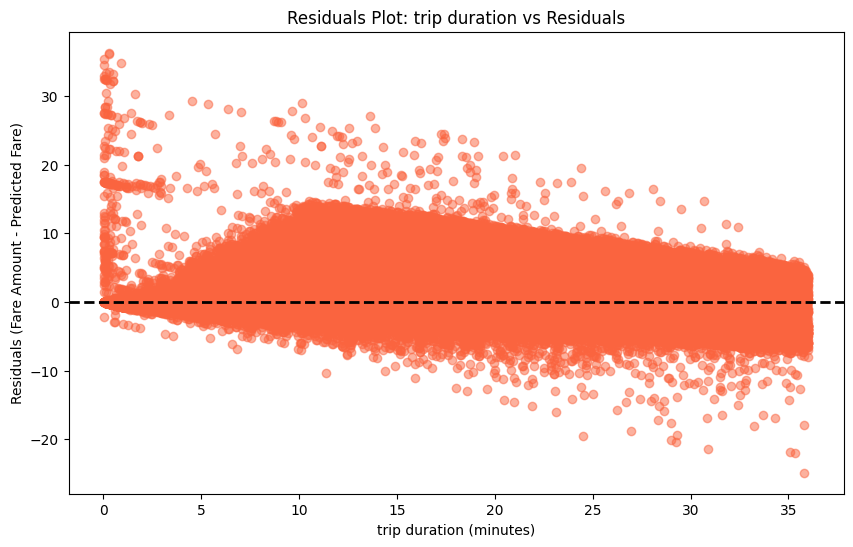

In [49]:
# Residual Plot to Detect Deviations/Anomalies
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(x_test, residuals, color='#FA643F', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('trip duration (minutes)')
plt.ylabel('Residuals (Fare Amount - Predicted Fare)')
plt.title('Residuals Plot: trip duration vs Residuals')
plt.show()

- Fare Variability by trip_duration range is analyzed by binning the trip_duration feature into different ranges (e.g., 0-10 mins, 10-20 mins, etc.) to analyze how the fare amount varies for different trip lengths.

In [50]:
# Exploring Variability of Fare Amount Based on trip_duration Ranges

# Create bins for trip_durations
taxi_data['trip_duration_bins'] = pd.cut(taxi_data['trip_duration'], bins=[0, 10, 20, 30, 60, np.inf], labels=['0-10 mins', '10-20 mins', '20-30 mins', '30-60 mins', '>60 mins'])
fare_variability = taxi_data.groupby('trip_duration_bins')['fare_amount'].agg(['mean', 'std', 'var'])
print("Fare Amount Variability Based on trip_duration Ranges:")
print(fare_variability)

Fare Amount Variability Based on trip_duration Ranges:
                         mean       std        var
trip_duration_bins                                
0-10 mins            6.857808  2.215743   4.909515
10-20 mins          12.907291  3.726069  13.883588
20-30 mins          19.145901  3.972433  15.780223
30-60 mins          24.087467  3.593769  12.915177
>60 mins                  NaN       NaN        NaN


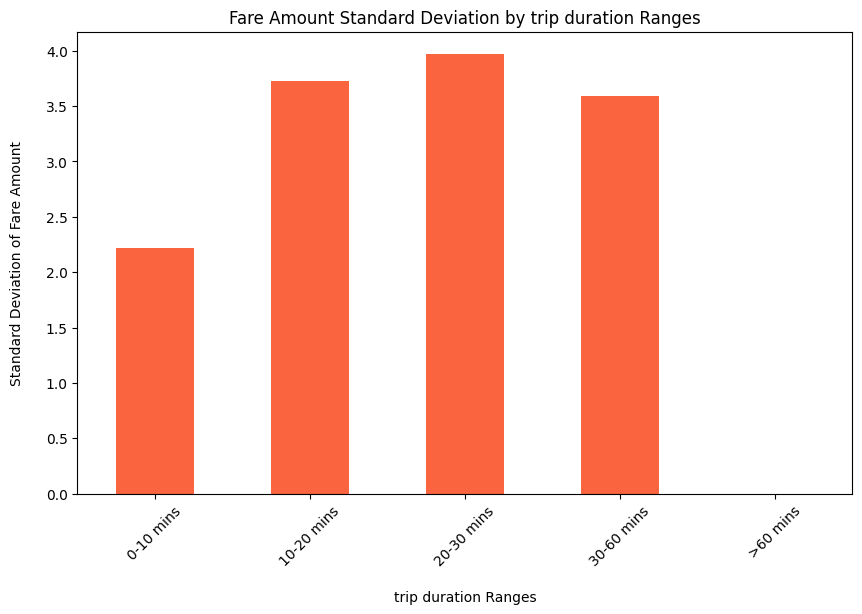

In [51]:
# Plot the standard deviation of fare amounts for different trip_duration ranges
plt.figure(figsize=(10, 6))
fare_variability['std'].plot(kind='bar', color='#FA643F', figsize=(10, 6))
plt.title('Fare Amount Standard Deviation by trip duration Ranges')
plt.ylabel('Standard Deviation of Fare Amount\n')
plt.xlabel('\ntrip duration Ranges')
plt.xticks(rotation=45)
plt.show()

## Interpretation of the results of linear regression

- Mean Squared Error (MSE): 8.12 indicates the average squared difference between the predicted fare amounts and the actual fare amounts.

- R-squared (on Test Set):  0.76 means that the model explains approximately 76% of the variance in fare amounts based on trip duration.

- Cross-Validation R-squared Scores:  The cross-validation R-squared scores are slightly higher on average (mean = 0.752) compared to the R-squared on the test set, but they are fairly consistent.

- Residual Behaviour: The residuals plot shows that the residuals are not uniformly distributed, especially at shorter trip durations (0-10 minutes).

- Fare Variability by trip_duration:  The standard deviation of fares increases with trip duration, reflecting that longer trips have more variability in fare amounts due to various factors.

### Further Investigation
1. Addressing the non-linear relationships especially for short trips by experimenting with polynomial or other non-linear models.
2. Adding additional features can help to improve the model's performance.
3. Investigating heteroscedasticity and applying transformations or models to hanfle non-constant variance.

## Note: It is difficult to tell anything about the model using mse.

In [52]:
# Calculating the Mean Fare
mean_fare = taxi_data['fare_amount'].mean()

# Creating the Baseline Predictions
y_baseline_pred = np.full_like(y_test, mean_fare)

# Calculating the MSE for the Baseline Model
baseline_mse = mean_squared_error(y_test, y_baseline_pred)

# Printing the Baseline MSE
print("Baseline Model MSE:", baseline_mse)

# Comparing the MSE's of both the models
print("Linear Regression Model MSE:", mean_squared_error(y_test, y_pred))



Baseline Model MSE: 33.92935235772805
Linear Regression Model MSE: 8.243426406853755


#### The linear regression model has a significantly lower MSE compared to the baseline model.

## Hypothesis testing

- In order to select the most suitable test for the current scenario, the initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution.

- Quantile-Quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed.

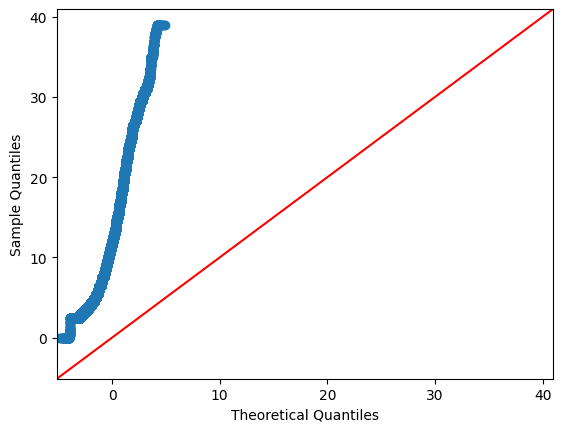

In [53]:
# Creating a Q-Q plot with 45 degree line added to plot
fig = sm.qqplot(taxi_data['fare_amount'], line = '45')
plt.show()

## Interpretation of Q-Q plot
- The data values clearly do not follow the red coloured 45-degree line, which is an indication that they do not follow a normal distribution.
- We cannot apply ANOVA and Chi-square test on this data. Remaining are z-test and t-test. A z-distribution will not be a good idea because the data is not normally distributed and also, the standard deviation of the population is unknown. Hence, T test will be used.
- Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.
- In the analysis of NYC Yellow Taxi Trip Records, it is likely to deal with an unknown population standard deviation and potentially large dataset. The T-test offers here a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts and payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

## Formulating the hypotheses
#### NULL HYPOTHESIS: There is no difference in average fare between customers using credit cards and customers using cash.
#### ALTERNATE HYPOTHESIS: There is a difference in the average fare between customers using credit cards vs cash.

In [54]:
# sample 1
credit_card = taxi_data[taxi_data['payment_type'] =='Card']['fare_amount']

# sample 2
cash = taxi_data[taxi_data['payment_type']=='Cash']['fare_amount']

# Performing t test on both the samples
t_stats, p_value = stats.ttest_ind(a = credit_card, b = cash, equal_var = False)
print('T statistics',t_stats,'P-value',p_value)

# Comparing the p value with the signifacne of 5% (or 0.05)
if p_value < 0.05:
  print('\nReject the null hypothesis')
else:
  print('\nFail to reject the null hypothesis')

T statistics 169.83701521279193 P-value 0.0

Reject the null hypothesis


## Interpretation of T-test results
- Since the p-value is significantly smaller than the significance level of 5%, the null hypothesis is therefore, rejected.
- Hence, it can be concluded that there is a significant difference statistically in the average fare amount between customers who use credit cards and customers who use cash.

## Key business insights
- Impact of Payment Type on Revenue:
1. Insight: The analysis reveals a clear difference in fare amounts between credit card and cash payments. Credit card payments are associated with higher average fares compared to cash.
2. Business Implication: Card payments could be encouraged more by offering promotions, attractive deals, discounts, or loyalty points, as it is more likely to generate higher revenue per trip.

- Trip duration as a Strong Predictor of Fare:
1. Insight: There is a strong positive correlation between trip duration and fare amount. Longer trips result in significantly higher fares.
2. Business Implication: Understanding this relationship can help optimize routes and time management for drivers. Drivers can focus on areas or times of the day that yield longer trips, such as airport routes or during peak hours.

- Passenger Count Influence on Payment Preferences:
1. Insight: Trips with higher passenger counts show a preference for card payments. Conversely, single-passenger trips have a higher tendency for cash payments.
2. Business Implication: This insight can be used to personalize payment method suggestions during bookings. For example, when groups book rides, card payments could be automatically suggested to increase revenue.

- Outliers and High-Value Trips:
1. Insight: Outliers in the dataset indicate some rare but high-value trips with extremely high fare amounts. These are often intercity or long-distance trips.
2. Business Implication: Taxi companies can offer premium services for these long-distance routes, or create partnerships with hotels and airports to capture these high-value trips more consistently.

- Revenue Optimization Strategies:
1. Insight: By focusing on encouraging payment methods (like cards) and analyzing peak hours and high-fare zones, taxi drivers can increase their earnings without increasing the number of trips.
2. Business Implication: Business owners can use data-driven strategies to optimize dispatching and driver scheduling to focus on these high-revenue opportunities.

- Customer Segmentation:
1. Insight: The data shows patterns in fare amounts and payment types that can be used to segment customers. For example, frequent long-distance travelers may prefer card payments, whereas local commuters may prefer cash.
2. Business Implication: This segmentation allows for targeted marketing campaigns, offering personalized discounts or services based on payment method or trip type.